In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [10]:
data_train_path = 'image_Classification/modified-dataset/train'
data_test_path = 'image_Classification/modified-dataset/test'
data_val_path = 'image_Classification/modified-dataset/val'

In [11]:
img_width = 180
img_height = 180

In [12]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False
)

Found 2400 files belonging to 10 classes.


In [14]:
data_cat = data_train.class_names

In [17]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                      image_size =(img_height, img_width),
                                                      shuffle = True,
                                                      batch_size = 32,
                                                      validation_split = False
                                                      )

Found 300 files belonging to 10 classes.


In [18]:
data_test = tf.keras.utils.image_dataset_from_directory(data_test_path,
                                                      image_size =(img_height, img_width),
                                                      shuffle = True,
                                                      batch_size = 32,
                                                      validation_split = False
                                                      )

Found 300 files belonging to 10 classes.


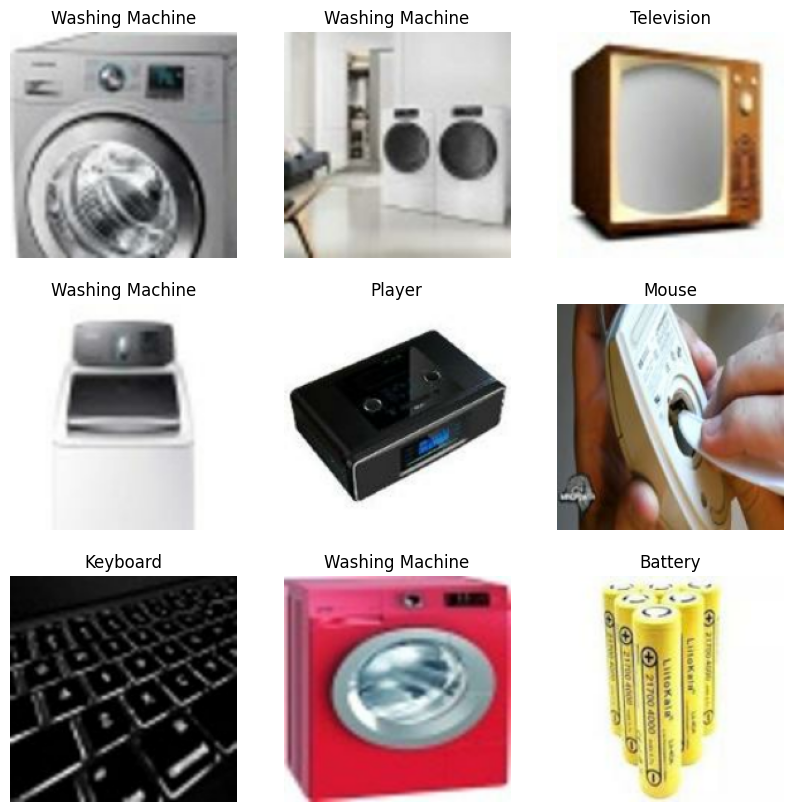

In [23]:
plt.figure(figsize=(10,10))
for image, label in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[label[i]])
        plt.axis('off')

In [25]:
from tensorflow.keras.models import Sequential

In [27]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [47]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding="same", activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [50]:
model.compile(optimizer = 'adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [52]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 24s 249ms/step - accuracy: 0.1779 - loss: 3.9391 - val_accuracy: 0.4367 - val_loss: 1.6132
Epoch 2/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 188ms/step - accuracy: 0.4872 - loss: 1.5155 - val_accuracy: 0.5667 - val_loss: 1.2893
Epoch 3/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 188ms/step - accuracy: 0.6477 - loss: 1.0321 - val_accuracy: 0.5900 - val_loss: 1.2324
Epoch 4/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 190ms/step - accuracy: 0.7481 - loss: 0.7609 - val_accuracy: 0.6233 - val_loss: 1.3372
Epoch 5/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 191ms/step - accuracy: 0.8418 - loss: 0.4726 - val_accuracy: 0.6467 - val_loss: 1.3191
Epoch 6/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 191ms/step - accuracy: 0.9198 - loss: 0.2758 - val_accuracy: 0.6567 - val_loss: 1.5770
Epoch 7/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 0.9364 - loss: 0.1941 - val_accuracy: 0.6533 - val_loss: 1.6115
Epoch 8/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 193ms/step - accuracy: 0.9714 - loss: 0.1301 - val_accu

Text(0.5, 1.0, 'loss')

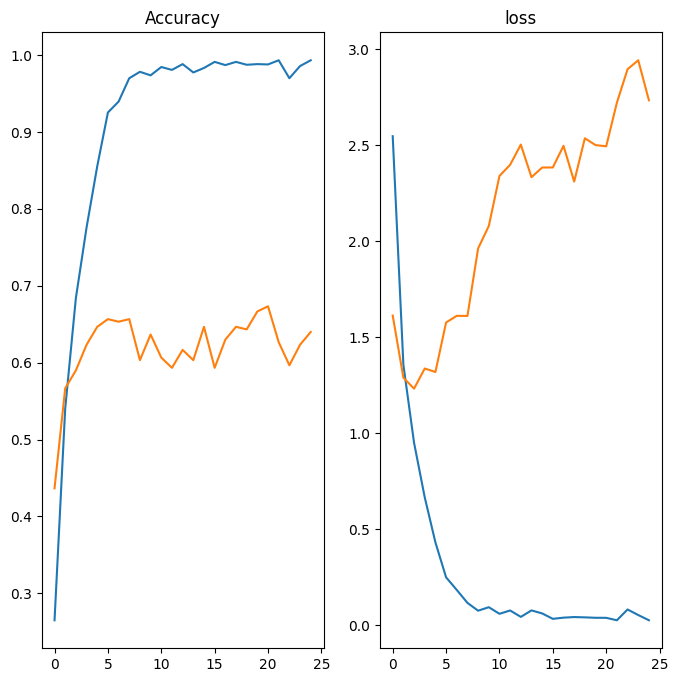

In [54]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training loss')
plt.plot(epochs_range,history.history['val_loss'],label = 'Validation loss')
plt.title('loss')

In [68]:
image = 'Mouse.jpeg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [69]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [70]:
score = tf.nn.softmax(predict)

In [71]:
print("these are {} electronic items. with accuracy of {:0.2f}".format(data_cat[np.argmax(score)],np.max(score)*100))

these are Player electronic items. with accuracy of 99.36


In [72]:
model.save('Image_classify.keras')